## Tavoitteet
Tämän analyysin tavoitteena on kokeilla muutamia eri konvoluutioverkkoja. Verkoilla luokitellaan onko kuvassa koira vai kissa.

## Datan Kuvaus
Datasetti sisältää monta kuvaa koirista ja kissoista. Kissoista ja koirista on yhtä paljon kuvia.

## Datan Esikäsittely
Aluksi otamme alkuperäisestä train-setistä 5000 kuvaa, ja jaamme ne eri kansioihin.

In [48]:
import os, shutil, pathlib
  
original_dir = pathlib.Path("C:\\Users\\aapos\\Desktop\\dkko\\machine-learning-AMK\\neural_networks\\dogs-vs-cats\\train\\train")                           
new_base_dir = pathlib.Path("dogs-vs-cats2")              
 
def make_subset(subset_name, start_index, end_index):          
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
  
make_subset("train", start_index=0, end_index=1000)            
make_subset("validation", start_index=1000, end_index=1500)    
make_subset("test", start_index=1500, end_index=2500)

Kansiorakenne näyttää nyt seuraavalta: 

cats_vs_dogs/
...train/     (2000 kuvaa)
......cat/    (1000 kuvaa) 
......dog/    (1000 kuvaa)
...validation/(1000 kuvaa)
......cat/    (500 kuvaa)
......dog/    (500 kuvaa)
...test/      (2000 kuvaa)
......cat/    (1000 kuvaa)
......dog/    (1000 kuvaa)

In [49]:
from tensorflow.keras.utils import image_dataset_from_directory
  
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2003 files belonging to 2 classes.


Yllä oleva koodi skaalaa kaikki kuvat saman kokoisiksi. 

## Oman Konvoluutioverkon mallintaminen
Seuraavaksi rakennamme oman konvoluutioverkon, ja sitten koulutamme sen.

In [36]:
from tensorflow import keras 
from tensorflow.keras import layers
  
inputs = keras.Input(shape=(180, 180, 3))                            
x = layers.Rescaling(1./255)(inputs)                                 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Verkossa on 11 piilokerrosta. Säädettäviä parametrejä on 991,041. Mallille asetetaan seuraavaksi loss-funktio ja optimisoija.

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Seuraavaksi malli koulutetaan. Valitsimme epochien määräksi 30.

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.5038 - loss: 0.7287 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.5361 - loss: 0.6963 - val_accuracy: 0.5820 - val_loss: 0.6585
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.5767 - loss: 0.6701 - val_accuracy: 0.5010 - val_loss: 1.2108
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6596 - loss: 0.6524 - val_accuracy: 0.6530 - val_loss: 0.6246
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.7100 - loss: 0.5786 - val_accuracy: 0.6600 - val_loss: 0.6239
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.7218 - loss: 0.5541 - val_accuracy: 0.7000 - val_loss: 0.5913
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.7300 - loss: 0.5458 - val_accuracy: 0.6850 - val_loss: 0.6092
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.7478 - loss: 0.5045 - val_accuracy:

## Arviointi

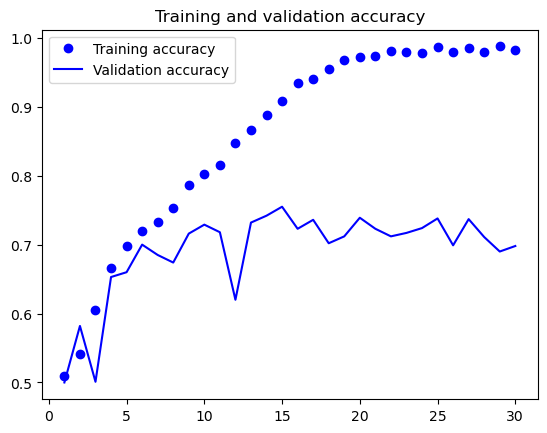

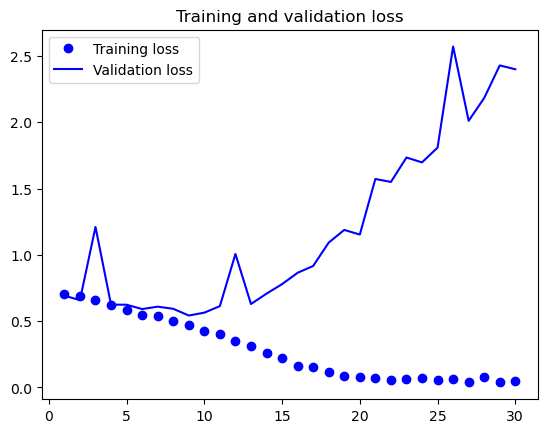

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Graafien perusteella voisimme päätellä parhaan epoch-määrän olevan 10. Täten saisimme hyvän tarkkuuden ja ylioppiminen olisi silti minimoitu.  Seuraavaksi käytämme testi-datasetin koulutetun mallin läpi.

In [17]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6896 - loss: 0.6380
Test accuracy: 0.701


## Oman konvoluutioverkon mallinnus augmentoiduilla kuvilla
Tämä prosessi ei eroa aikaisemmasta mallinnuksesta hirveästi, mutta käytämme tässä augmentoituja kuvia.

In [18]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Määritämme tässä miten kuvat saavat muokkautua. Kuvat saavat kääntyä vaaka-suuntaisesti, kuvat saavat pyöriä 10% verran ja kuvat saavat zoomata 20% verran.

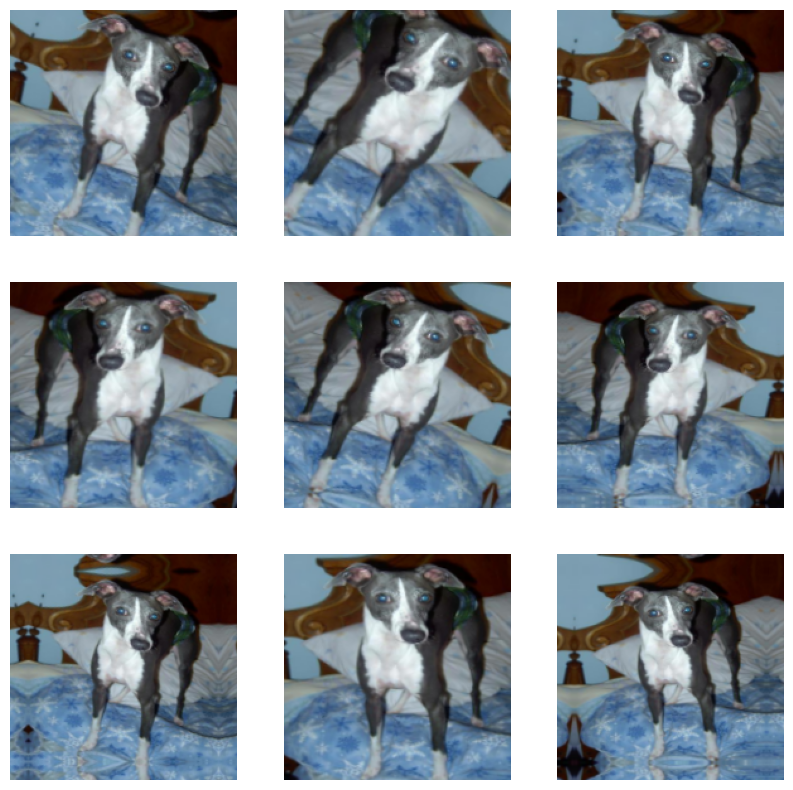

In [19]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_dataset.take(1):                           
    for i in range(9):
        augmented_images = data_augmentation(images)              
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))   
        plt.axis("off")

Yllä on esimerkkejä augmentoidusta kuvista.

In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Konvoluutioverkko on samanlainen kuin aikaisemmin, mutta siihen on lisätty nyt Dropout-kerros. Dropout-kerros on lisätty, koska haluamme vähentää ylioppimista vielä enemmän. Arvo on 0.5 eli puolet neuroneista eivät aktivoidu. 

Seuraavaksi koulutamme mallin, käytämme nyt 100:aa epochia kokeilun vuoksi.

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.4980 - loss: 0.7288 - val_accuracy: 0.5330 - val_loss: 0.6890
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.5193 - loss: 0.6989 - val_accuracy: 0.5500 - val_loss: 0.6832
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5380 - loss: 0.6944 - val_accuracy: 0.5550 - val_loss: 0.6810
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5672 - loss: 0.6784 - val_accuracy: 0.5240 - val_loss: 0.6799
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.6155 - loss: 0.6664 - val_accuracy: 0.6430 - val_loss: 0.6340
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.6280 - loss: 0.6351 - val_accuracy: 0.6710 - val_loss: 0.6095
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.6401 - loss: 0.6472 - val_accuracy: 0.6440 - val_loss: 0.6153
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.6799 - loss: 0.6173 - 

## Arviointi

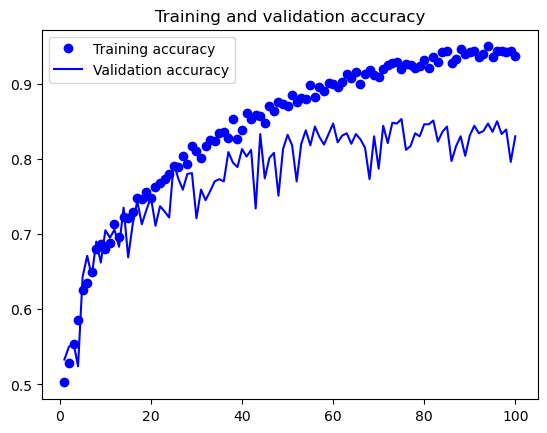

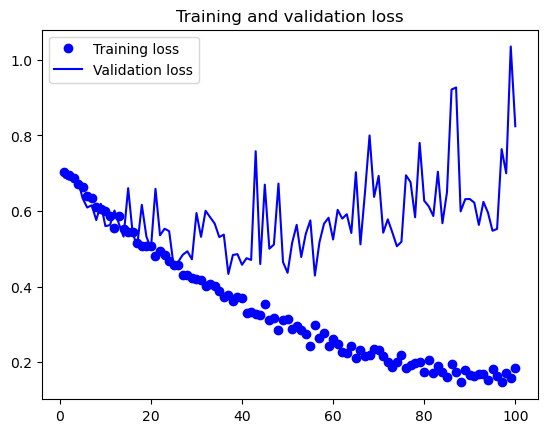

In [22]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Validaatiotarkkuuden kasvu alkaa pysähtymään n. 30 epochin jälkeen. Validaation loss-funktion kuvaaja alkaa erkaantumaan training loss kuvaajasta noin 25 epochin jälkeen.
Voisimme määritellä, että paras epoch määrä olisi jossain 25:n ja 30:n välillä. Seuraavasta koodista näemme tarkuuden olevan 0.827, joka on parempi kuin aikaisemmassa mallissa.

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8235 - loss: 0.4742
Test accuracy: 0.827


## Valmiin mallin mallinnus
Seuraavaksi käytämme oman konvoluutioverkon sijasta valmiiksi koulutettua neuroverkkoa. Kyseinen verkko on VGG16, joka tarkoitettu kuvien tunnistamiseen. Ensin lataamme mallin. 

In [41]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [42]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Mallilla on hyvin paljon parametrejä: 14,714,688. Malli muistuttaa muuten aikaisempaa konvoluutiomallia, paitsi sillä ei ole output-kerrosta.
Seuraavaksi käytämme valmista mallia jokaisen kuvan ennustukseen. Tallennamme sitten ennustukset ja käytämme niitä lopullisen luokittelijan koulutukseen.

In [39]:
import numpy as np
  
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
  
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Teemme tässä pienen verkon, jonka koulutamme vgg16-verkon antamilla ennustuksilla.

In [55]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)               
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8601 - loss: 27.6080 - val_accuracy: 0.9670 - val_loss: 5.4248
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9752 - loss: 3.9129 - val_accuracy: 0.9610 - val_loss: 6.8996
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9844 - loss: 1.6416 - val_accuracy: 0.9760 - val_loss: 3.9563
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9890 - loss: 1.6175 - val_accuracy: 0.9740 - val_loss: 5.7717
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9850 - loss: 2.0701 - val_accuracy: 0.9750 - val_loss: 4.6066
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9944 - loss: 0.7486 - val_accuracy: 0.9760 - val_loss: 5.0614
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9969 - loss: 0.3174 - val_accuracy: 0.9770 - val_loss: 4.4635
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9995 - loss: 0.0475 - val_accuracy: 0.9800 - val_lo

## Arviointi

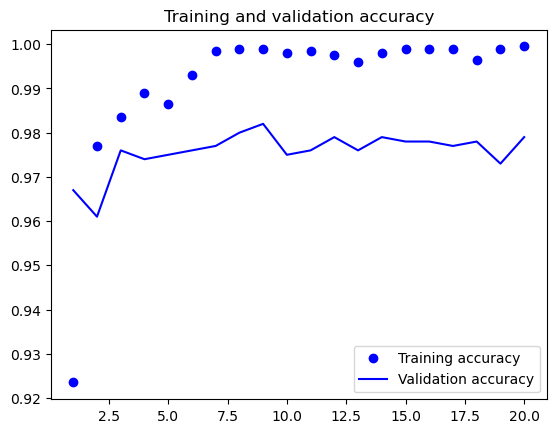

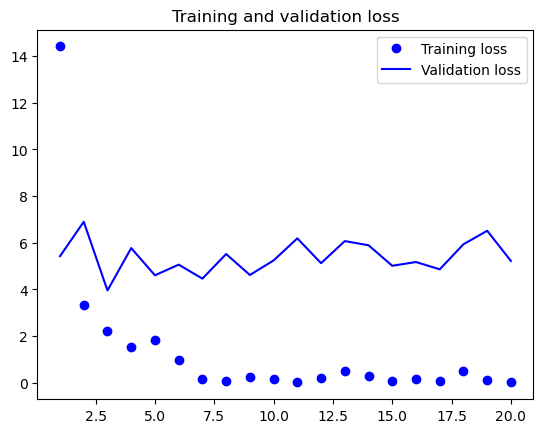

In [56]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Graafeista näemme mallin ylioppivan hyvin herkästi. Jo epochin 2 jälkeen molemmat graafit näyttävät selviä merkkejä ylioppimisesta. Paras epochien määrä vaikuttaisi olevan siis 2.

Seuraavaksi kokeilemme, osaako kouluttamamme malli ennustaa oikein itse valitsemamme kuvat.  

In [46]:
oma_dataset = image_dataset_from_directory(
    new_base_dir / "omat",
    image_size=(180, 180),
    batch_size=32)

Found 10 files belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


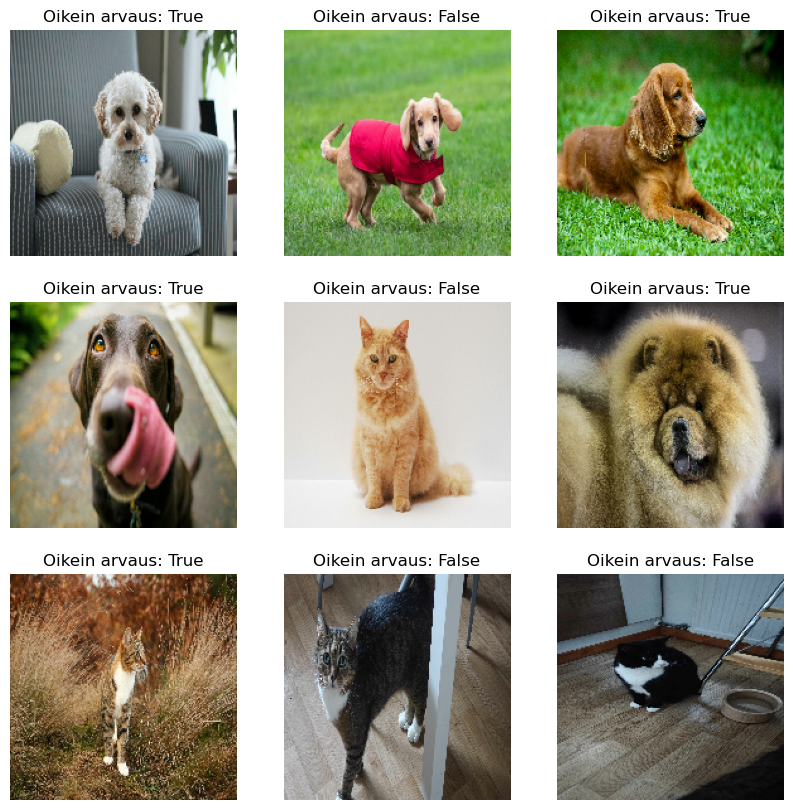

In [57]:
oma_features, oma_labels = get_features_and_labels(oma_dataset)
preds = model.predict(oma_features)
pred_classes = preds.astype(int).flatten()

plt.figure(figsize=(10, 10))

for images, labels in oma_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        is_correct = labels[i].numpy() == pred_classes[i]
        plt.title(f'Oikein arvaus: {is_correct}')
        plt.axis("off")

Yllä näemme mallin antamat arvaukset ja kyseiset kuvat. Boolean-arvo kertoo onko arvaus mennyt oikein vai ei.

## Yhteenveto
- Miksi siirto-oppiminen auttaa?
  - Siirto-oppimisen avulla voimme käyttää jotain mallia joka on koulutettu aikaisemmin ja sen on todettu olevan hyvä omaan tarkoitukseensa. Säästämme myös aikaa, kun meidän ei tarvitse kouluttaa omaa mallia. Valmis malli voi myös olla sellainen, että omalla tietokoneella sen kouluttamiseen menisi vuosia, joten ajansäästö voi olla hyvin merkittävä.
- Miten data-augmentaatio vaikuttaa tuloksiin?
  - Data-augmentaatio on helppo tapa lisätä kuvien määrää millä mallia voi kouluttaa. Huomasimme myös sen vähentävän ylioppimisen mahdollisuutta, sekä laskevan `loss` arvon nousua ylikoulutuksen tapahtumisessa.
- Mitkä olivat suurimmat haasteet?
  - Oikeiden parameterien, kuten epochien löytäminen, jotta mallit eivät ylikoulutu, mutta pysyvät tarkkoina.
- Mitä kokeilisit seuraavaksi parantaaksesi suorituskykyä?
  - Voisimme laajentaa datasettiä sisältämään enemmän kuvia. Neuroverkkoon voisi lisätä enemmän kerroksia. 